# Support Vector Machine


In [ ]:
# !pip install tensorflow-gpu

In [ ]:
# !nvidia-smi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.svm import SVC 

tf.__version__

'2.8.2'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Group Project/depression.csv')
df

,Code,Age_Numerical,Gender,Marital,Marital_problems,Religion_binary,Religion_help,Med_or_not,Expenses,Monthly_expenses,...,DASS_stress_numerical,MSPSS_family,MSPSS_friends,MSPSS_significant_others,DASS_depression_binary,DASS_depression_severity,DASS_anxiety_binary,DASS_anxiety_severity,DASS_stress_binary,DASS_stress_severity
0,1,34,0,0,0,1,1,1,2,1,...,0,27.2,24.0,26.0,0,0,0,0,0,0
1,2,32,1,0,0,1,1,1,1,0,...,2,28.0,28.0,28.0,0,0,0,0,0,0
2,3,33,0,0,0,1,1,1,1,0,...,0,28.0,28.0,28.0,0,0,0,0,0,0
3,4,33,1,0,1,1,1,1,2,1,...,18,25.2,21.2,24.0,1,2,1,4,1,1
4,5,39,1,0,0,1,1,1,2,1,...,2,26.0,20.0,28.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,23,1,1,0,0,1,1,2,1,...,8,25.2,25.2,27.2,0,0,0,0,0,0
312,313,36,0,1,0,0,0,0,2,1,...,0,23.2,20.0,24.0,0,0,0,0,0,0
313,314,33,0,0,0,0,0,1,2,1,...,0,25.2,19.2,27.2,0,0,0,0,0,0
314,315,25,1,1,0,1,0,1,0,0,...,26,14.0,13.2,13.2,1,4,1,2,1,2


### Data preprocessing

### Extract input and output features

In [5]:
from collections import Counter
X = df
y = df['DASS_depression_severity']

X = X.drop(columns='DASS_depression_severity')
print(Counter(y))

Counter({0: 201, 1: 49, 2: 37, 3: 16, 4: 13})


### Oversampling and undersampling due to uneven distribution

In [6]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy={0: 201, 1: 50, 2: 50, 3: 30, 4: 30})
X, y = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y)}")

Oversampled: Counter({0: 201, 2: 50, 1: 50, 3: 30, 4: 30})


In [7]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy={0: 100, 1: 50, 2: 50, 3: 30, 4: 30})
X, y = under.fit_resample(X, y)
print(f"Combined Random Sampling: {Counter(y)}")

Combined Random Sampling: Counter({0: 100, 1: 50, 2: 50, 3: 30, 4: 30})


### One hot encoding for categorical data

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
X[['Alone','Friends/Coursemates','Family']] = ohe.fit_transform(X['Living_with1'].values.reshape(-1,1))
X[['< RM1000','RM1000 - 3000','> RM3000']] = ohe.fit_transform(X['Expenses'].values.reshape(-1,1))
# y = ohe.fit_transform(y.values.reshape(-1,1))

X = X.drop(columns=['Living_with1','Expenses'])


### Remove unnecessary features

In [9]:
print(X.columns)
X.drop(columns=['Code','Residence_high_COVID1','Living_with','Monthly_expenses',
                 'DASS_depression_numerical','DASS_anxiety_numerical','DASS_stress_numerical',
                 'DASS_depression_binary','DASS_anxiety_binary','DASS_anxiety_severity','DASS_stress_binary','DASS_stress_severity',
                 'Religion_binary','Med_or_not',
                 ],
        inplace=True, axis=1)
print(X.columns)

Index(['Code', 'Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_binary', 'Religion_help', 'Med_or_not', 'Monthly_expenses',
       'Living_with', 'Worry_family', 'Routine_loss', 'Class_hours',
       'Stress_class_disrupted', 'Medical_illness', 'Mental_illness',
       'COVID_symptoms', 'Residence_high_COVID1', 'Residence_high_COVID',
       'Quarantine', 'DASS_depression_numerical', 'DASS_anxiety_numerical',
       'DASS_stress_numerical', 'MSPSS_family', 'MSPSS_friends',
       'MSPSS_significant_others', 'DASS_depression_binary',
       'DASS_anxiety_binary', 'DASS_anxiety_severity', 'DASS_stress_binary',
       'DASS_stress_severity', 'Alone', 'Friends/Coursemates', 'Family',
       '< RM1000', 'RM1000 - 3000', '> RM3000'],
      dtype='object')
Index(['Age_Numerical', 'Gender', 'Marital', 'Marital_problems',
       'Religion_help', 'Worry_family', 'Routine_loss', 'Class_hours',
       'Stress_class_disrupted', 'Medical_illness', 'Mental_illness',
       '

In [10]:
X

,Age_Numerical,Gender,Marital,Marital_problems,Religion_help,Worry_family,Routine_loss,Class_hours,Stress_class_disrupted,Medical_illness,...,Quarantine,MSPSS_family,MSPSS_friends,MSPSS_significant_others,Alone,Friends/Coursemates,Family,< RM1000,RM1000 - 3000,> RM3000
0,34,1,0,0,0,0,0,6.0,0,0,...,0,28.0,28.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,1,1,0,0,0,0,8.0,1,0,...,0,22.0,22.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0
2,34,0,0,0,1,0,0,3.0,1,0,...,0,22.0,20.0,24.0,0.0,0.0,1.0,0.0,1.0,0.0
3,35,1,0,0,1,1,0,2.0,0,0,...,0,27.2,28.0,25.2,0.0,1.0,0.0,0.0,1.0,0.0
4,25,1,1,0,1,0,0,3.0,0,0,...,0,28.0,27.2,24.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,22,1,1,0,1,0,1,1.0,1,1,...,0,12.0,19.2,20.0,0.0,0.0,1.0,1.0,0.0,0.0
256,24,1,1,0,0,0,1,4.0,1,0,...,0,9.2,14.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0
257,22,1,1,0,1,0,1,1.0,1,1,...,0,12.0,19.2,20.0,0.0,0.0,1.0,1.0,0.0,0.0
258,25,1,1,0,0,0,1,6.0,1,1,...,0,14.0,13.2,13.2,0.0,0.0,1.0,1.0,0.0,0.0


### Split into the training and test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(182, 23) (182,)
(78, 23) (78,)


### Feature normalisation



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

def featureNormalisation():
  numeric_data = ['Age_Numerical', 'Class_hours', 'MSPSS_family', 'MSPSS_friends', 'MSPSS_significant_others']

  ct = ColumnTransformer([('scaler', StandardScaler(), numeric_data)], remainder='passthrough')

  X_train_scaled = ct.fit_transform(X_train)
  # print(pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out()))
  # the test set uses the fitted scaler in train dataset to transform in the test set
  X_test_scaled = ct.transform(X_test)
  return X_train_scaled, X_test_scaled, ct.get_feature_names_out()

In [16]:
X_train_scaled, X_test_scaled, ct = featureNormalisation()

### Train Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# train the model on train set
model = SVC()
model.fit(X_train_scaled, y_train)
 
# print prediction results
predictions = model.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))

0.5


### Hyperameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


### Performance metrics

### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

grid_predictions = grid.predict(X_test_scaled)

# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        30
           1       1.00      0.06      0.12        16
           2       1.00      0.62      0.77        16
           3       1.00      0.70      0.82        10
           4       1.00      0.83      0.91         6

    accuracy                           0.68        78
   macro avg       0.91      0.64      0.67        78
weighted avg       0.83      0.68      0.63        78



### Confusion Matrix

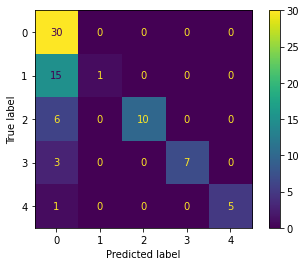

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

### Accuracy

In [ ]:
print(accuracy_score(y_test, grid_predictions))

0.6794871794871795


### ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class = 'ovo')

0.7699999999999999

### Plot of ROC curve

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse=False)
y_pred = one.fit_transform(grid_predictions.reshape(-1,1))

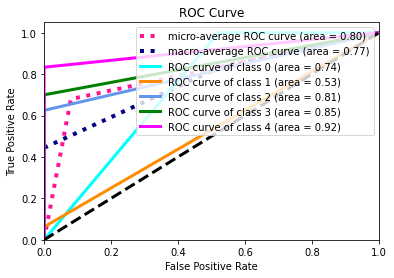

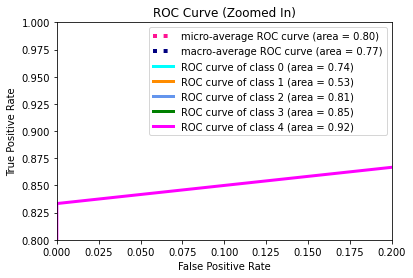

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from numpy import interp
from itertools import cycle

n_classes = 5

# Plot linewidth.
lw = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Zoomed In)')
plt.legend(loc="upper right")
plt.show()

### Save model and scaler

In [ ]:
import joblib
joblib.dump(grid, 'svc')

['svc']

In [18]:
joblib.dump(ct, 'svc_scaler.pkl')

['svc_scaler.pkl']